# MLP data : MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data import DataLoader

## Data preprocessing

In [2]:
batch_size = 12

train_data = datasets.MNIST("./datasets/", train=True, download=True,transform=transforms.ToTensor())
test_data = datasets.MNIST("./datasets/",train=False,download=True,transform=transforms.ToTensor())

train_loader = DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test_data,batch_size = batch_size)

## Model

> Hyper parameter로 hidden units을 받을려면 nn.ModuleList()를 사용해야함

In [3]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.in_dim = 28*28 # MNIST
        self.out_dim = 10
        
        self.fc1 = nn.Linear(self.in_dim, 512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        self.fc5 = nn.Linear(64,self.out_dim)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
        
    def forward(self,x):
        a1 = self.relu(self.fc1(x.view(-1, self.in_dim)))
        a2 = self.relu(self.fc2(a1))
        a3 = self.relu(self.fc3(a2))
        a4 = self.relu(self.fc4(a3))
        logit = self.fc5(a4)
        return logit

In [4]:
class MLP_h(nn.Module):
    def __init__(self, hidden_units = [512,256,128,64]):
        super().__init__()
        
        self.in_dim = 28*28 # MNIST
        self.out_dim = 10
        
        self.l_layers = []
        self.l_layers.append(nn.Linear(self.in_dim,hidden_units[0]))
        for i in range(len(hidden_units)-1) :
            self.l_layers.append(nn.Linear(hidden_units[i],hidden_units[i+1]))
        self.l_layers.append(nn.Linear(hidden_units[-1],self.out_dim))
        
        self.l_layers = nn.ModuleList(self.l_layers)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
        
    def forward(self,x):
        a = x.view(-1,self.in_dim)
        
        for i in range(len(self.l_layers)) :
            z = self.l_layers[i](a)
            if i != len(self.l_layers) -1 :
                a = self.relu(z)
            else : 
                out = z
                
        return out

## Train

In [5]:
def train(model,criterion,optimizer,epoch) :
    model = model
    criterion = criterion
    optimizer = optimizer
    
    for epoch in range(epoch):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs: data is a list of [inputs, labels]
            inputs, labels = data

            #zero the parameter gradients
            optimizer.zero_grad()

            #forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (i+1) % 2000 == 0:
                print("[%d, %5d] loss : %.3f" %
                     (epoch+1, i+1, running_loss/2000))
                running_loss = 0
    return model

In [6]:
hidden_units = [512,256,128,64]
model_list = []

print("Training MLP for MNIST per layer")
for i in range(len(hidden_units)) :
    model = MLP_h(hidden_units = hidden_units[i:])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    print("MLP : " + str(len(hidden_units[i:])+1) + " layers")
    model_list.append(train(model,criterion,optimizer,10))
    print("-------------------------------------------------")
    print()

Training MLP for MNIST per layer
MLP : 5 layers
[1,  2000] loss : 2.247
[1,  4000] loss : 0.793
[2,  2000] loss : 0.334
[2,  4000] loss : 0.248
[3,  2000] loss : 0.165
[3,  4000] loss : 0.152
[4,  2000] loss : 0.114
[4,  4000] loss : 0.104
[5,  2000] loss : 0.077
[5,  4000] loss : 0.084
[6,  2000] loss : 0.061
[6,  4000] loss : 0.060
[7,  2000] loss : 0.048
[7,  4000] loss : 0.049
[8,  2000] loss : 0.039
[8,  4000] loss : 0.037
[9,  2000] loss : 0.027
[9,  4000] loss : 0.033
[10,  2000] loss : 0.024
[10,  4000] loss : 0.024
-------------------------------------------------

MLP : 4 layers
[1,  2000] loss : 1.512
[1,  4000] loss : 0.433
[2,  2000] loss : 0.289
[2,  4000] loss : 0.242
[3,  2000] loss : 0.178
[3,  4000] loss : 0.155
[4,  2000] loss : 0.127
[4,  4000] loss : 0.125
[5,  2000] loss : 0.096
[5,  4000] loss : 0.098
[6,  2000] loss : 0.076
[6,  4000] loss : 0.082
[7,  2000] loss : 0.063
[7,  4000] loss : 0.065
[8,  2000] loss : 0.053
[8,  4000] loss : 0.057
[9,  2000] loss : 0.

# Test

In [7]:
print("Testing MLP for MNIST per layer")

for i,model in enumerate(model_list) :
    print("Accuracy of " + str(5-i) + " layer MLP")
    n_predict = 0
    n_correct = 0

    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs,1)

        n_predict += len(predicted)
        n_correct += (labels == predicted).sum()

    print(f"{n_correct}/{n_predict}")
    print(f"Accuracy: {n_correct/n_predict: .3f}")
    print("-------------------------------------------------")
    print()

Testing MLP for MNIST per layer
Accuracy of 5 layer MLP
9770/10000
Accuracy:  0.977
-------------------------------------------------

Accuracy of 4 layer MLP
9764/10000
Accuracy:  0.976
-------------------------------------------------

Accuracy of 3 layer MLP
9736/10000
Accuracy:  0.974
-------------------------------------------------

Accuracy of 2 layer MLP
9653/10000
Accuracy:  0.965
-------------------------------------------------



## Visualization

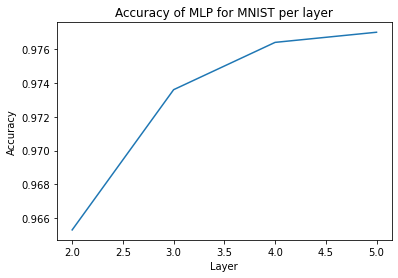

<Figure size 432x288 with 0 Axes>

In [9]:
# Compute the accuracy of each layer
accuracy = []
for i,model in enumerate(model_list) :
    n_predict = 0
    n_correct = 0

    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs,1)

        n_predict += len(predicted)
        n_correct += (labels == predicted).sum()

    accuracy.append(n_correct/n_predict)

# Plot the accuracy of each layer
layer = [5,4,3,2]
plt.plot(layer,accuracy)
plt.xlabel("Layer")
plt.ylabel("Accuracy")
plt.title("Accuracy of MLP for MNIST per layer")
plt.show()
plt.savefig("accuracy_mlp_mnist.png")

In [17]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

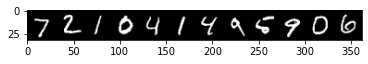

GroundTruth
   7   2   1   0   4   1   4   9   5   9   0   6
Prediction
   7   2   1   0   4   1   4   9   6   9   0   6


In [18]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=batch_size))
print("GroundTruth")
print(" "+" ".join("%3s"%label.item() for label in labels))

outputs = model(images)
_,predicted = torch.max(outputs,1)
print("Prediction")
print(" "+" ".join("%3s"%label.item() for label in predicted))